# Introduction

In this notebook we will **motivate** and **implement from scratch** two **Convolutional Neural Networks (CNNs)** that had big impacts on the field of Deep Learning. Namely, we will look at **LeNet-5** (Yann LeCunn et al., 1989), which is considered one of the first CNNs ever and also **AlexNet** (Alex Krizhevsky et al., 2012), which won the 2012 ImageNet competition by an impressive marging and introduced many techniques that are considered **state of the art** even today (e.g. dropout, maxpooling, relu, etc). 

These networks offer a glimpse into the history of computer vision, including the **early trends** and **challenges**. Limited computational resources in particular have led to the **rapid innovation** we've seen in the last few decades. 

### Architectures

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/960px-Comparison_image_neural_networks.svg.png" width="520" height="520">
</center>

By todays standards these models are relatively **simplistic**, being only 5 or 8 layers deep. In comparison, many high end CNNs nowadays have **over 100 layers**. To understand these models we need to understand what each layer does.

# CNN layers

### Convolutional layer

<center>
<img src="https://www.researchgate.net/profile/Hiromu-Yakura/publication/323792694/figure/fig1/AS:615019968475136@1523643595196/Outline-of-the-convolutional-layer.png" width="220" height="220">
</center>

Convolutional layers are the main **building blocks** of CNNs. They work by taking the **dot product** with a set of **filters** and a **sliding window** of the input image. The result is a set of local **features**, like edges and constrast, that can be helpful in describing the images. The learnable parameters are only the **weights** contained in the filters and due to their small size, these layers can be implemented quite **effeciently**. 

### Pooling layer

<center>
<img src="https://www.researchgate.net/profile/Imran-Ali-12/publication/340812216/figure/fig4/AS:928590380138496@1598404607456/Pooling-layer-operation-oproaches-1-Pooling-layers-For-the-function-of-decreasing-the.png" width="280" height="280">
</center>

The primary function of the pooling layer is to **downsample** the image sizes, e.g. from 64x64 to 32x32. It works by partitioning the image into squares and applying a **non-linear transformation** over thoses squares. The most common types of pooling are **average pooling**, where the average is taken of each square, and **max pooling**, where the maximum is taken of each square.

### Activation layer

<center>
<img src="https://www.researchgate.net/profile/Junxi-Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm" width="520" height="520">
</center>

This can be considered either part of the previous layer or as a layer of its own. Activation functions apply a **non-linear transformation** to the previous later, which enable the model to **learn more complex relationships**. Common activation functions are the **Rectified Linear Unit (ReLU)**, hyperbolic tan (tanh) and sigmoid. For the final layer, **softmax** can be used to produce predicted class probabilities.

### Dense layer

<center>
<img src="https://www.researchgate.net/profile/Alex-Kost-2/publication/336607800/figure/fig4/AS:814973764767744@1571316295028/Visualization-of-a-fully-connected-layer-Taken-from-Hollemans-72.ppm" width="220" height="220">
</center>

Dense or **fully connected** layers are the standard layers in a neural network, where every neuron in the previous layer is connected to the current layer through weights and biases. 

### Dropout

<center>
<img src="https://miro.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png" width="420" height="420">
</center>

Dropout is a clever way to **prevent** your model from **overfitting** the training data by **randomly 'turning off'** each neuron **independently** with some probability p. The result is that the model cannot rely on any particular neuron and instead has to make predictions using several different neurons. 

**Putting the pieces together**

Now that we understand all the different components of a CNN, let's code it up from scratch. We will use the **keras sequential model** as this is probably the **easiest** way to do it.

# Libraries

In [1]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import time
import warnings
warnings.filterwarnings("ignore")
import gc

# Sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model

**Reproducibility**

In [2]:
# Set random seeds
def set_seed(seed=0):
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seed()

# LeNet-5 

[LeNet-5](https://en.wikipedia.org/wiki/LeNet) is a 5 layer CNN made up of **2 convolutional layers** with average pooling followed by **3 fully connected layers**. 

*Notes:*

* It is interesting to note that at the time the perfered **activation functions** were all smooth (e.g. sigmoid, tanh, etc). It was not until later (~2010) that ReLU took over as the prefered activation function we see today. 

* Furthermore, **average pooling** wasn't used for any significant reason other than to reduce the size of the network to be able to train it in a reasonable time. **Maxpooling** was quickly found to produce better results and provide additional properties like translation invariance. 

* Finally, observe the pattern that as you go **deeper** into the network, the **image sizes** tend to **shrink** and the number of **channels**/filters tends to **increase**. This pattern is still favoured today. 

We will code it using a keras sequential model for the task of handwritten **digit recognition** via the MNIST dataset as it was originally designed for. 

In [3]:
# 5 layer CNN
def build_LeNet5(input_shape=(28,28,1)):
    # Sequential model
    model = keras.Sequential([

    # Input shape
    keras.Input(shape=input_shape),    # shape=(28,28,1)
    
    # Layer 1
    layers.Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='sigmoid'),          # shape=(28,28,6)
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),                   # shape=(14,14,6)
    
    # Layer 2
    layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='sigmoid'),        # shape=(10,10,16)
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding="valid"),                   # shape=(5,5,16)
    
    # Layer 3
    layers.Flatten(),                                    # shape=(400,1)
    layers.Dense(units=120, activation='sigmoid'),       # shape=(120,1)
    
    # Layer 4
    layers.Dense(units=84, activation='sigmoid'),        # shape=(84,1)
    
    # Layer 5
    layers.Dense(units=10, activation='softmax')         # shape=(10,1)
    ])
    
    # Compile model (SGD = stochastic gradient descent)
    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    
    return model

In [4]:
# Model summary
model=build_LeNet5()
model.summary()

2022-06-07 22:21:41.719447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 22:21:41.828685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 22:21:41.829527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 22:21:41.831130: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

2022-06-07 22:21:41.837162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 22:21:41.837872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 22:21:41.838596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 22:21:44.254255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 22:21:44.255147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# AlexNet

[AlexNet](https://en.wikipedia.org/wiki/AlexNet) provided a breakthrough moment in Deep Learning by showing the world the power of CNNs. After Alex won the ImageNet competition he presented his work to leading researches at a conference and wrote what some call the **most influential** [paper](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) in the field of computer vision, which so far has **over 100,000 citations**. 

*Notes:*

* Many **improvements** have been made compared to LeNet-5. **ReLU** is the activation used, which makes training much faster. **Maxpooling** is being used instead of average pooling. And **dropout** has been introduced, a type of regularisation which allows the model to go deeper without overfitting.
* We still observe the pattern that as you go **deeper** the **image sizes decrease** and the number of **channels increase**. 

The original AlexNet was trained to classify images to one of **1000 classes**. For this demonstration we will restrict the problem to **CIFAR-10**, i.e. where there are only **10 classes**, so that training doesn't take too long. 

In [5]:
# 8 layer CNN
def build_AlexNet(input_shape=(224,224,3)):
    # Sequential model
    model = keras.Sequential([

    # Input shape
    keras.Input(shape=input_shape),    # shape=(224,224,3)
    
    # Layer 1
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),          # shape=(54,54,96)
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),                       # shape=(26,26,96)
    
    # Layer 2
    layers.Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),        # shape=(26,26,256)
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),                    # shape=(12,12,256)
    
    # Layer 3
    layers.Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),        # shape=(12,12,384)
        
    # Layer 4
    layers.Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),        # shape=(12,12,384)
        
    # Layer 5
    layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),        # shape=(12,12,256)
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),                    # shape=(5,5,256)
        
    # Layer 6
    layers.Flatten(),                                     # shape=(6400,1)
    layers.Dense(units=4096, activation='relu'),          # shape=(4096,1)
    layers.Dropout(rate=0.5),
    
    # Layer 7
    layers.Dense(units=4096, activation='relu'),          # shape=(4096,1)
    layers.Dropout(rate=0.5),
    
    # Layer 8
    layers.Dense(units=10, activation='softmax')        # shape=(10,1) --> original was (1000,1)
    ])
    
    # Compile model (SGD = stochastic gradient descent)
    model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    return model

In [6]:
# Model summary
model=build_AlexNet()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 256)      

# MNIST

MNIST is a **database** of 10's of thousands of **handwritten digits**. It is also **historic** because it was created in 1998, a time where obtaining large labelled datasets for **supervised learning** was very **difficult**. It is sometimes described as the **Titinic** dataset of **computer vision**. 

In [7]:
# Training data
mnist_train=pd.read_csv('../input/digit-recognizer/train.csv')

# Test data (scale to be in [0,1])
mnist_test=pd.read_csv('../input/digit-recognizer/test.csv')/255

# Dimensions
print('Training dataframe dimensions:', mnist_train.shape)
print('Test dataframe dimensions:', mnist_test.shape)

# First 5 entries of training data
mnist_train.head()

Training dataframe dimensions: (42000, 785)
Test dataframe dimensions: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Preview first few images**

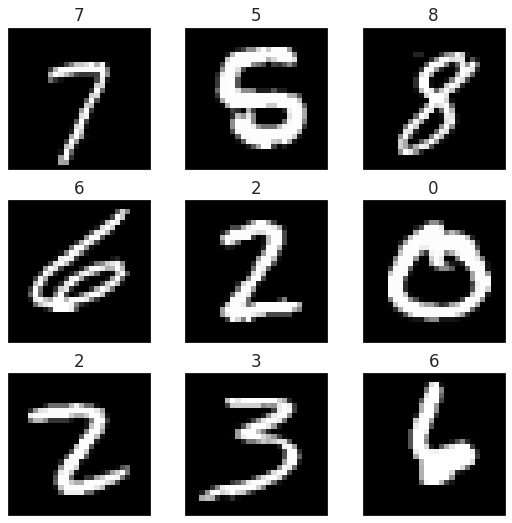

In [8]:
# Figure size
plt.figure(figsize=(9,9))

# Subplot 
for i in range(9):
    img = np.asarray(mnist_train.iloc[i+18,1:].values.reshape((28,28))/255);
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.title.set_text(f'{mnist_train.iloc[i+18,0]}')
    plt.imshow(img, cmap='gray')
    
plt.show()

**Labels and features**

In [9]:
# Labels
y=mnist_train.label

# One-hot encoding of labels
y=pd.get_dummies(y)

# Scale features to be in [0,1]
X=mnist_train.drop('label', axis=1)/255

# Delete to save memory
del mnist_train
gc.collect()

931

**Split data**

In [10]:
# Train-valid split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

**Reshape data**

In [11]:
# Reshape (-1 means unspecified)
X = X.values.reshape(-1, 28, 28, 1)

# Reshape
mnist_test = mnist_test.values.reshape(-1, 28, 28, 1)

**Split data**

In [12]:
# Train-valid split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

**Train model**

In [13]:
# Build model
model = build_LeNet5()

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=True
)

2022-06-07 22:21:52.425229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-06-07 22:21:53.802963: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1050/1050 [==============================] - 11s 4ms/step - loss: 2.3061 - categorical_accuracy: 0.1057 - val_loss: 2.3014 - val_categorical_accuracy: 0.1144
Epoch 2/200
1050/1050 [==============================] - 4s 4ms/step - loss: 2.3030 - categorical_accuracy: 0.1070 - val_loss: 2.3021 - val_categorical_accuracy: 0.1024
Epoch 3/200
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3028 - categorical_accuracy: 0.1091 - val_loss: 2.3028 - val_categorical_accuracy: 0.1144
Epoch 4/200
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3030 - categorical_accuracy: 0.1072 - val_loss: 2.3005 - val_categorical_accuracy: 0.1144
Epoch 5/200
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3025 - categorical_accuracy: 0.1082 - val_loss: 2.3024 - val_categorical_accuracy: 0.0967
Epoch 6/200
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3024 - categorical_accuracy: 0.1100 - val_loss: 2.3007 - val_categorical_accuracy: 0.11

**Learning curves**

Final accuracy on validation set: 0.9752380847930908


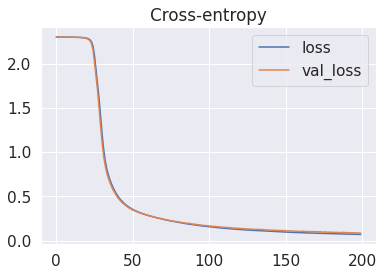

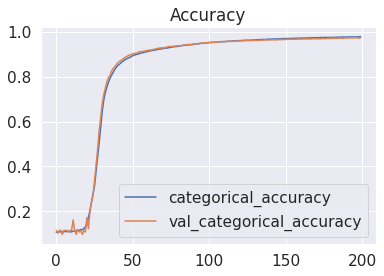

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title="Accuracy")

print('Final accuracy on validation set:', history_df.loc[len(history_df)-1,'val_categorical_accuracy'])

Notice how the train and valid metrics are basically on top of each other. This means the model is **generalising very well** whilst achieving **high accuracy**. This is an example of a model with **low bias** and **low variance** - impressive! 

**Test set predictions**

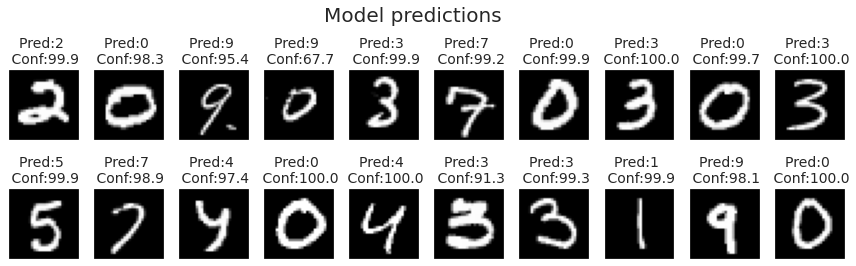

In [15]:
# Predictions
preds = model.predict(mnist_test)

# Confidence
conf = np.max(preds, axis=1)

# Retrieve most likely classes
pred_classes = np.argmax(preds, axis=1)

# Plot some model predictions
plt.figure(figsize=(15,4))
plt.suptitle('Model predictions', fontsize=20, y=1.05)

# Subplot
for i in range(20):
    img = mnist_test[i].reshape((28,28))/255;
    ax=plt.subplot(2, 10, i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Pred:{pred_classes[i]} \n Conf:{np.round(100*conf[i],1)}', fontdict = {'fontsize':14})
    plt.imshow(img, cmap='gray')
    
plt.show()

**Clear memory**

In [16]:
# Clear memory
del mnist_test, X, y, X_train, X_valid, y_train, y_valid, model, history, history_df, preds, conf, pred_classes
gc.collect()

26224

# CIFAR-10

CIFAR-10 is a **large dataset** of thousands of **32x32 colour images** in **10 different classes**. It is often used as a **benchmark** for scientific research in computer vision.

In [17]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Define the 10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


**Scale pixels**

In [18]:
# Scale to lie in [0,1]
X_train = X_train / 255
X_test = X_test / 255

**Split data**

In [19]:
# Train-valid split (subset to speed up training)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, train_size=0.16, test_size=0.04, random_state=0)

# Reduce test set (10%)
X_test = X_test[:1000]
y_test = y_test[:1000]

# Print shape
print('X_train shape', X_train.shape)
print('X_valid shape', X_valid.shape)
print('X_test shape', X_test.shape)

X_train shape (8000, 32, 32, 3)
X_valid shape (2000, 32, 32, 3)
X_test shape (1000, 32, 32, 3)


In [20]:
# Use tf dataset API
train_ds=tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_ds=tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_ds=tf.data.Dataset.from_tensor_slices((X_test, y_test))

**Preview first few images**

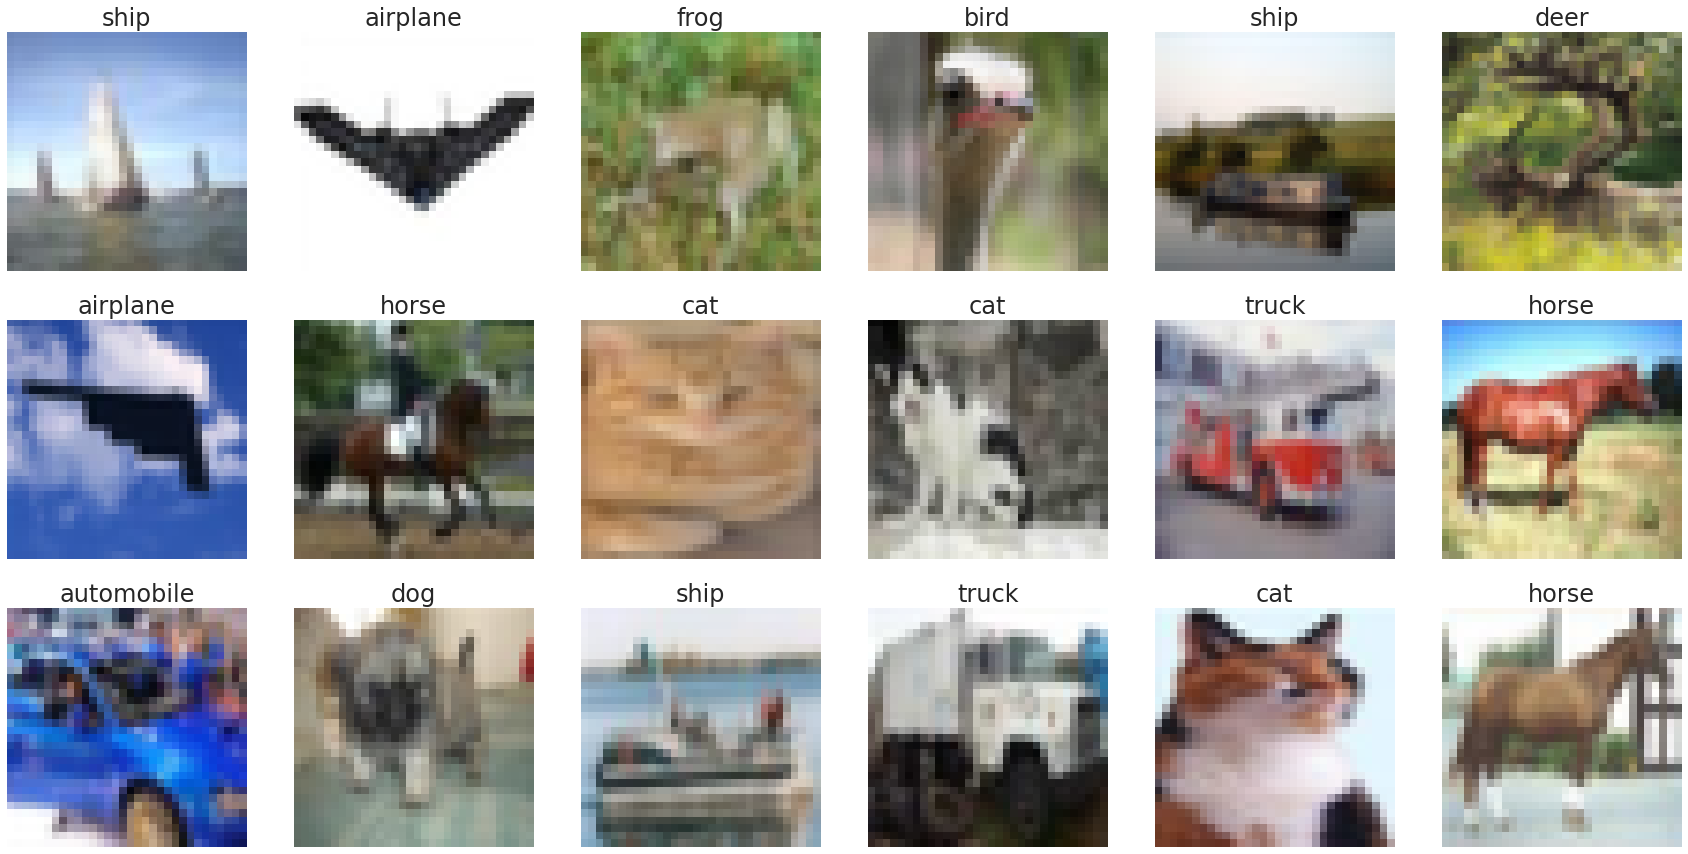

In [21]:
plt.figure(figsize=(30,15))
for i,(image,label) in enumerate(train_ds.take(18)):
    ax=plt.subplot(3,6,i+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()[0]], fontsize=24)
    plt.axis('off')

**Data pipeline**

In [22]:
# Resize images
def resize_image(image, label):
    image=tf.image.resize(image, (224,224))  # upscale to work with AlexNet
    return image, label

# Apply transformations
train_ds=(train_ds.map(resize_image)
          .shuffle(buffer_size = 8000)
          .batch(batch_size=32,drop_remainder=True)
          )

valid_ds=(valid_ds.map(resize_image)
          #.shuffle(buffer_size = 2000)
          .batch(batch_size=32,drop_remainder=True)
          )

test_ds=(test_ds.map(resize_image)
         #.shuffle(buffer_size = 1000)
         .batch(batch_size=32,drop_remainder=True)
         )

**Train model**

In [23]:
# Build model
model = build_AlexNet()

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True,
)

# Train model
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=100,
    #callbacks=[early_stopping],
    verbose=True
)

Epoch 1/100
250/250 [==============================] - 14s 31ms/step - loss: 2.2945 - sparse_categorical_accuracy: 0.1161 - val_loss: 2.2631 - val_sparse_categorical_accuracy: 0.1452
Epoch 2/100
250/250 [==============================] - 13s 31ms/step - loss: 2.2090 - sparse_categorical_accuracy: 0.1700 - val_loss: 2.1489 - val_sparse_categorical_accuracy: 0.1941
Epoch 3/100
250/250 [==============================] - 13s 30ms/step - loss: 2.1102 - sparse_categorical_accuracy: 0.2173 - val_loss: 2.0216 - val_sparse_categorical_accuracy: 0.2465
Epoch 4/100
250/250 [==============================] - 13s 31ms/step - loss: 2.0288 - sparse_categorical_accuracy: 0.2535 - val_loss: 2.0133 - val_sparse_categorical_accuracy: 0.2540
Epoch 5/100
250/250 [==============================] - 14s 31ms/step - loss: 1.9442 - sparse_categorical_accuracy: 0.2885 - val_loss: 1.8424 - val_sparse_categorical_accuracy: 0.3150
Epoch 6/100
250/250 [==============================] - 13s 31ms/step - loss: 1.8441 -

**Learning curves**

Final accuracy on validation set: 0.6411290168762207


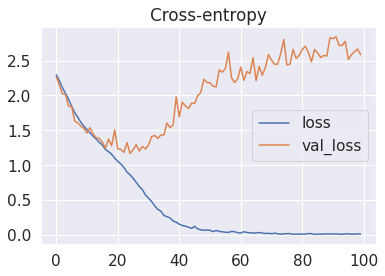

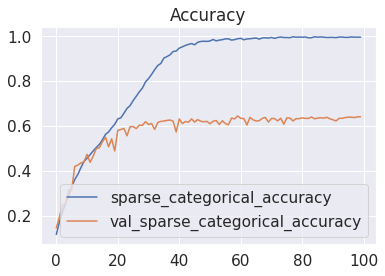

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(title="Accuracy")

print('Final accuracy on validation set:', history_df.loc[len(history_df)-1,'val_sparse_categorical_accuracy'])

This time we can see some **overfitting** occuring. This is likely because the model has many **learnable parameters** (~50 million!) and **little regularisation**. That being said the performance is still quite good considering CIFAR-10 is a challenging dataset to well on. 

A simple **improvement** would be to use **data augmentation** to artificially 'create' more training data. This usually helps a model generalise better to unseen data.

**Test set predictions**

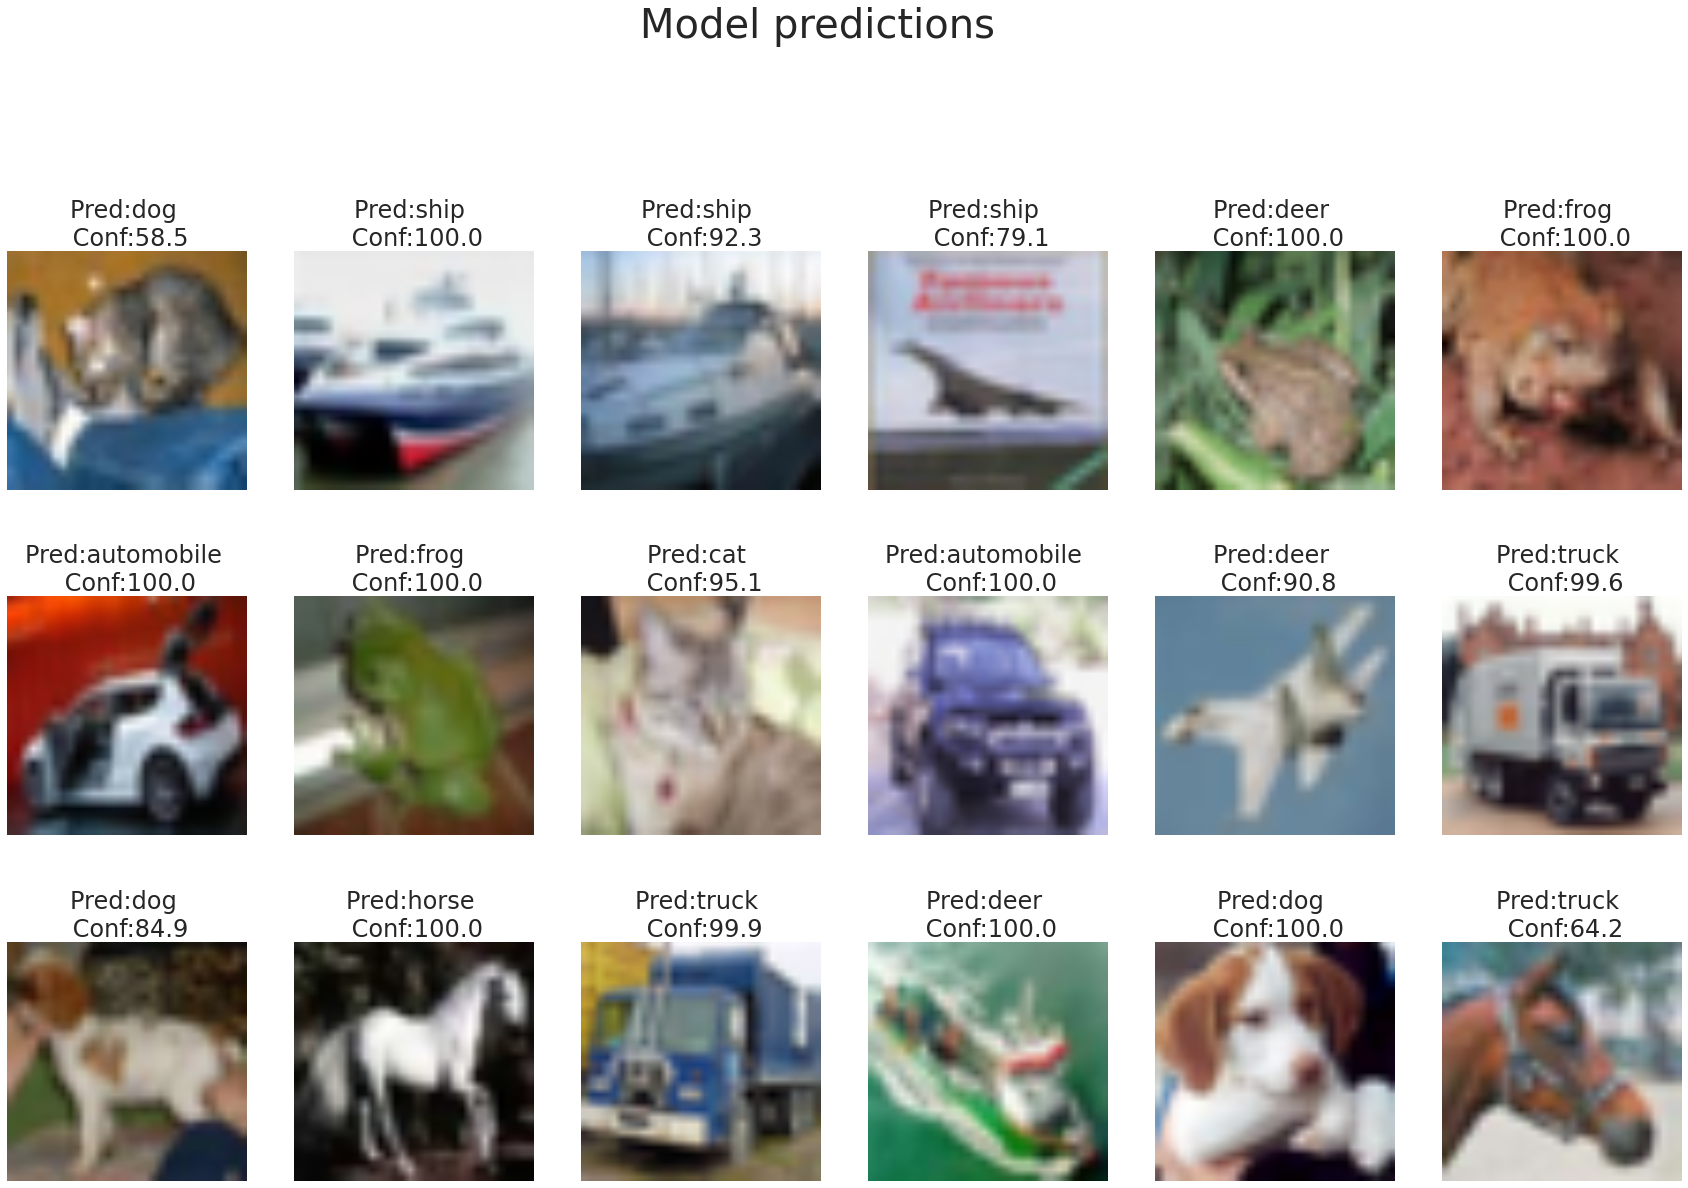

In [25]:
# Predictions
preds = model.predict(test_ds)

# Confidence
conf = np.max(preds, axis=1)

# Retrieve most likely classes
pred_classes = np.argmax(preds, axis=1)
pred_names = []
for index, i in enumerate(pred_classes):
    pred_names.append(class_names[i])

# Plot some model predictions
plt.figure(figsize=(30,18))
plt.suptitle('Model predictions', fontsize=40, y=1.05)

# Subplot
for i,(image,label) in enumerate(test_ds.take(1)):
    for j in range(18):
        ax=plt.subplot(3,6,j+1)
        plt.imshow(image[j])
        plt.title(f'Pred:{pred_names[j]} \n Conf:{np.round(100*conf[j],1)}', fontsize=24)
        plt.axis('off')

plt.show()

# Conclusion

In this notebook, we looked at two **famous and important CNNs** in detail and **implemented** them from scratch using the keras framework. Even though these models are **relatively simple** by todays standards, they still achieve very **impressive performance**. The ideas introduced in these models had and continue to have a **profound impact** on the field of computer vision.

**Acknowledgments**

* [AlexNet CNN Architecture on Tensorflow (beginner)](https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner) by [Ananta Raj](https://www.kaggle.com/vortexkol).
* [Convolutional Neural Networks](https://www.coursera.org/learn/convolutional-neural-networks) by [Andrew NG](https://en.wikipedia.org/wiki/Andrew_Ng).

Thanks for reading!